In [239]:
import json
from IPython.core.display import display
from ipywidgets import Output
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


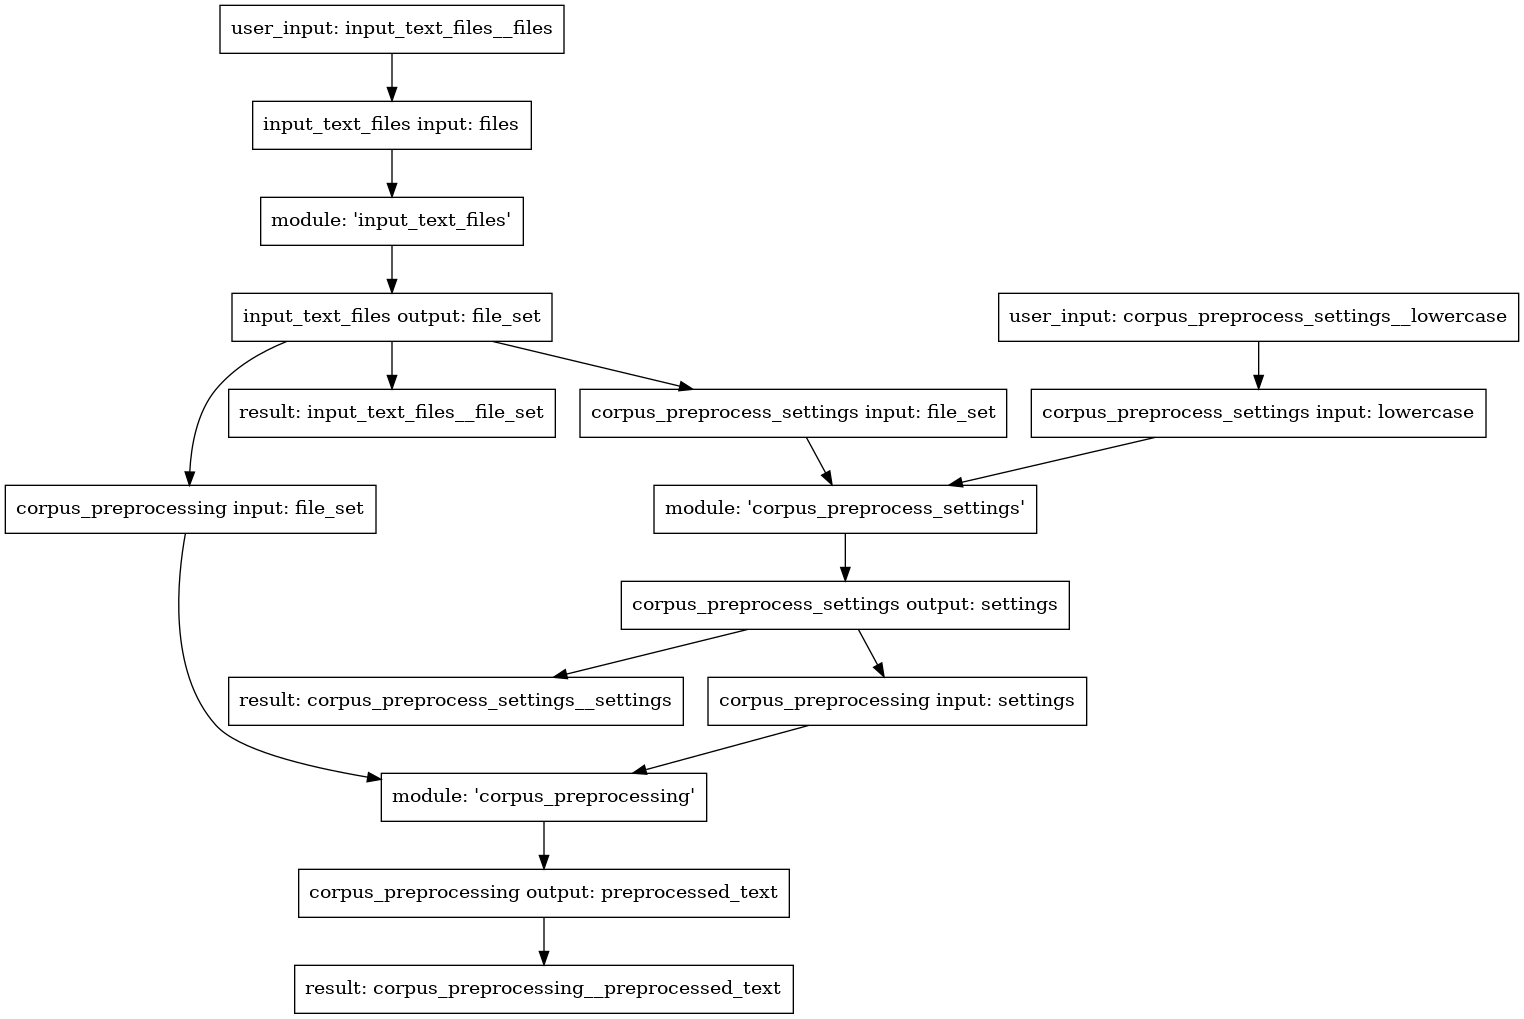

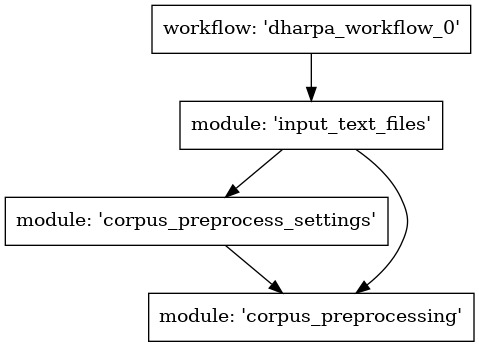

In [240]:
import networkx as nx
from rich.jupyter import print
from dharpa_toolbox.utils import graph_to_image


from dharpa_toolbox.workflows import DharpaWorkflow, ALL_MODULE_CLASSES

print(ALL_MODULE_CLASSES)

config = {
    "modules": [
        {"type": "files_collection",
         "id": "input_text_files",
        },
        # {"type": "files_collection",
        #  "id": "stopword_file",
        # },
        {"type": "text_preprocess_settings",
         "id": "corpus_preprocess_settings",
         "input_map": {
             "file_set": "input_text_files"
         }},
        {"type": "text_preprocessing",
         "id": "corpus_preprocessing",
         "input_map": {
             "file_set": "input_text_files",
             "settings": "corpus_preprocess_settings"
         }
         }
    ]
}


dw = DharpaWorkflow(**config)

m_input_text_files = dw.get_module("input_text_files")
# m_stowwords = dw.get_module("stopword_file")

display(graph_to_image(dw.data_flow_graph))
display(graph_to_image(dw.execution_graph))

In [241]:
m_input_text_files.inputs.files = "/home/markus/projects/dharpa/dharpa_toolbox/environment.yml"

def print_module_status(m):
    print("Module status")
    print(m.current_state)

def print_workflow_status():
    print("Workflow status")
    print(dw.current_state)

print_workflow_status()

# m_input_text_files.process()
# m_stowwords.process()
dw.process()

print_workflow_status()

print(json.dumps(dw.current_structure))

Executing level: 1
Executing: module: 'input_text_files'
file_set = DharpaFiles(files=(DharpaFile(name=environment.yml size=5508),))
Workflow output 'input_text_files__file_set' updated: DharpaFiles(files=(DharpaFile(name=environment.yml size=5508),))
Setting output: file_set
Value: DharpaFiles(files=(DharpaFile(name=environment.yml size=5508),))
Descendants:
TARGET: corpus_preprocess_settings input: file_set
TARGET: corpus_preprocessing input: file_set
-------
Executing level: 2
Executing: module: 'corpus_preprocess_settings'
settings = {'lowercase': True}
Workflow output 'corpus_preprocess_settings__settings' updated: {'lowercase': True}
Setting output: settings
Value: {'lowercase': True}
Descendants:
TARGET: corpus_preprocessing input: settings
-------
Executing level: 3
Executing: module: 'corpus_preprocessing'
environment.yml = b''
Setting output: preprocessed_text
Value: {}
Descendants:
-------
